Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA(Exploratory Data Analysis)

In [5]:
df.shape

(908, 25)

This dataset contain 908 rows and 25 columns out of which 2 is target variable and remaining 23 are independent variables.

To check the data types of the columns

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

To check the null values

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [10]:
df['wepp_id'].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [11]:
df['estimated_generation_gwh'].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [12]:
df['wepp_id']=df['wepp_id'].astype(str)

In [13]:
df['wepp_id'].dtypes

dtype('O')

In [14]:
df['estimated_generation_gwh']=df['estimated_generation_gwh'].astype(str)

In [15]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                      object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh     object
dtype: object

In [16]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [17]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                      object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh     object
dtype: object

In [18]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2',],axis=1,inplace=True)

In [19]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [20]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [22]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0.0,0.0,0.0,658.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,520.0,98.0,24.7663,74.6090,1.0,NaN,258.0,174.0,173.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,2.0,854.0,39.2,21.9038,69.3732,7.0,NaN,2.0,21.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,NaN,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,0.0,0.0,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,NaN,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,494.0,1600.0,16.2949,77.3568,1.0,2016.0,NaN,22.0,58.0,2.0,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0.0
904,0.0,0.0,904.0,823.0,3.0,12.8932,78.1654,6.0,NaN,114.0,77.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,0.0,0.0,905.0,892.0,25.5,15.2758,75.5811,7.0,NaN,NaN,21.0,260.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,0.0,0.0,906.0,540.0,80.0,24.3500,73.7477,1.0,NaN,91.0,59.0,82.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [24]:
df

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.0,0.0,0.0,2.5,28.1839,73.2407,6.0,2011.0,109.0,128.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,98.0,24.7663,74.6090,1.0,NaN,174.0,173.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,2.0,39.2,21.9038,69.3732,7.0,NaN,21.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,3.0,135.0,23.8712,91.3602,2.0,2004.0,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,0.0,0.0,4.0,1800.0,21.9603,82.4091,1.0,2015.0,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,1600.0,16.2949,77.3568,1.0,2016.0,22.0,58.0,2.0,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,0.0,0.0,904.0,3.0,12.8932,78.1654,6.0,NaN,77.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
905,0.0,0.0,905.0,25.5,15.2758,75.5811,7.0,NaN,21.0,260.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
906,0.0,0.0,906.0,80.0,24.3500,73.7477,1.0,NaN,59.0,82.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.describe()

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.0,908.0,908.00000,908.000000,908.000000,862.000000,908.000000,528.000000,908.000000,908.000000,889.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,0.0,0.0,453.50000,321.046378,21.196189,77.447848,3.205947,1996.876894,43.823789,94.429515,1.727784,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,0.0,0.0,262.26132,580.221767,6.088110,4.907260,2.281339,17.047817,44.624092,70.352824,0.682902,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.0,0.0,0.00000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.75000,16.837500,17.057825,74.258975,1.000000,1988.000000,22.000000,58.000000,2.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,0.0,0.0,453.50000,60.000000,21.278850,76.719250,3.000000,2000.000000,22.000000,58.000000,2.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,0.0,0.0,680.25000,388.125000,25.183775,79.441475,6.000000,2011.250000,29.250000,115.250000,2.000000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,0.0,0.0,907.00000,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,303.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [27]:
df['year_of_capacity_data'].nunique()

1

In [28]:
df['name'].nunique()

908

In [29]:
df.drop(['name','url'],axis=1,inplace=True)

In [30]:
df['geolocation_source'].unique()

array([ 1.,  2., nan,  0.])

In [31]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [32]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [33]:
df.fillna(df.median()[0], inplace=True)

In [34]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Here, we can see all the null values has been removed

In [35]:
df['source'].nunique()

191

In [36]:
df['geolocation_source'].nunique()

3

In [37]:
df['country'].nunique()

1

In [38]:
df['country_long'].nunique()

1

 Dropping columns 'country' and 'country_long' because having one country name only, it will not help for any prediction

In [39]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    float64
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    float64
 6   geolocation_source   908 non-null    float64
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(12)
memory usage: 85.2 KB


<Axes: xlabel='primary_fuel', ylabel='count'>

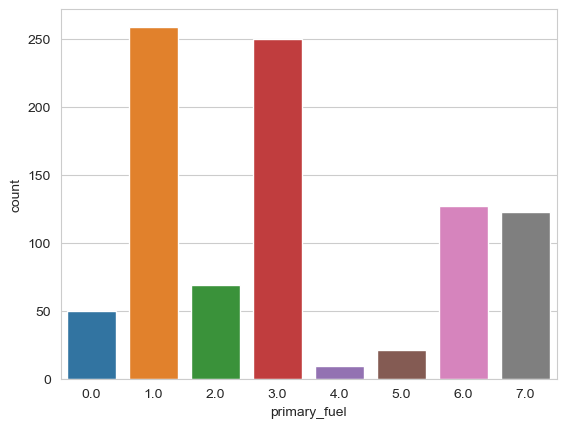

In [41]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

<Axes: >

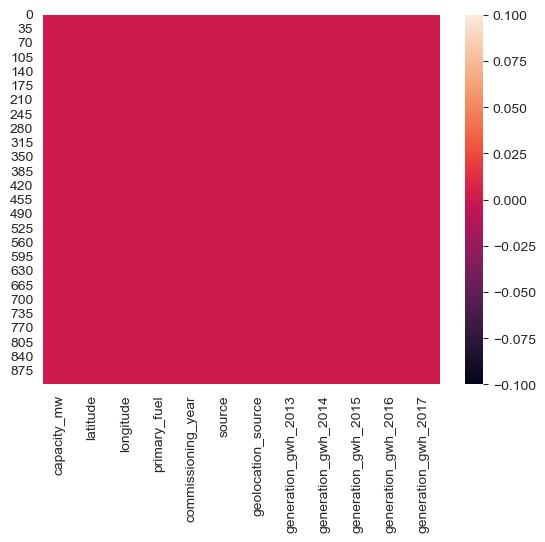

In [42]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

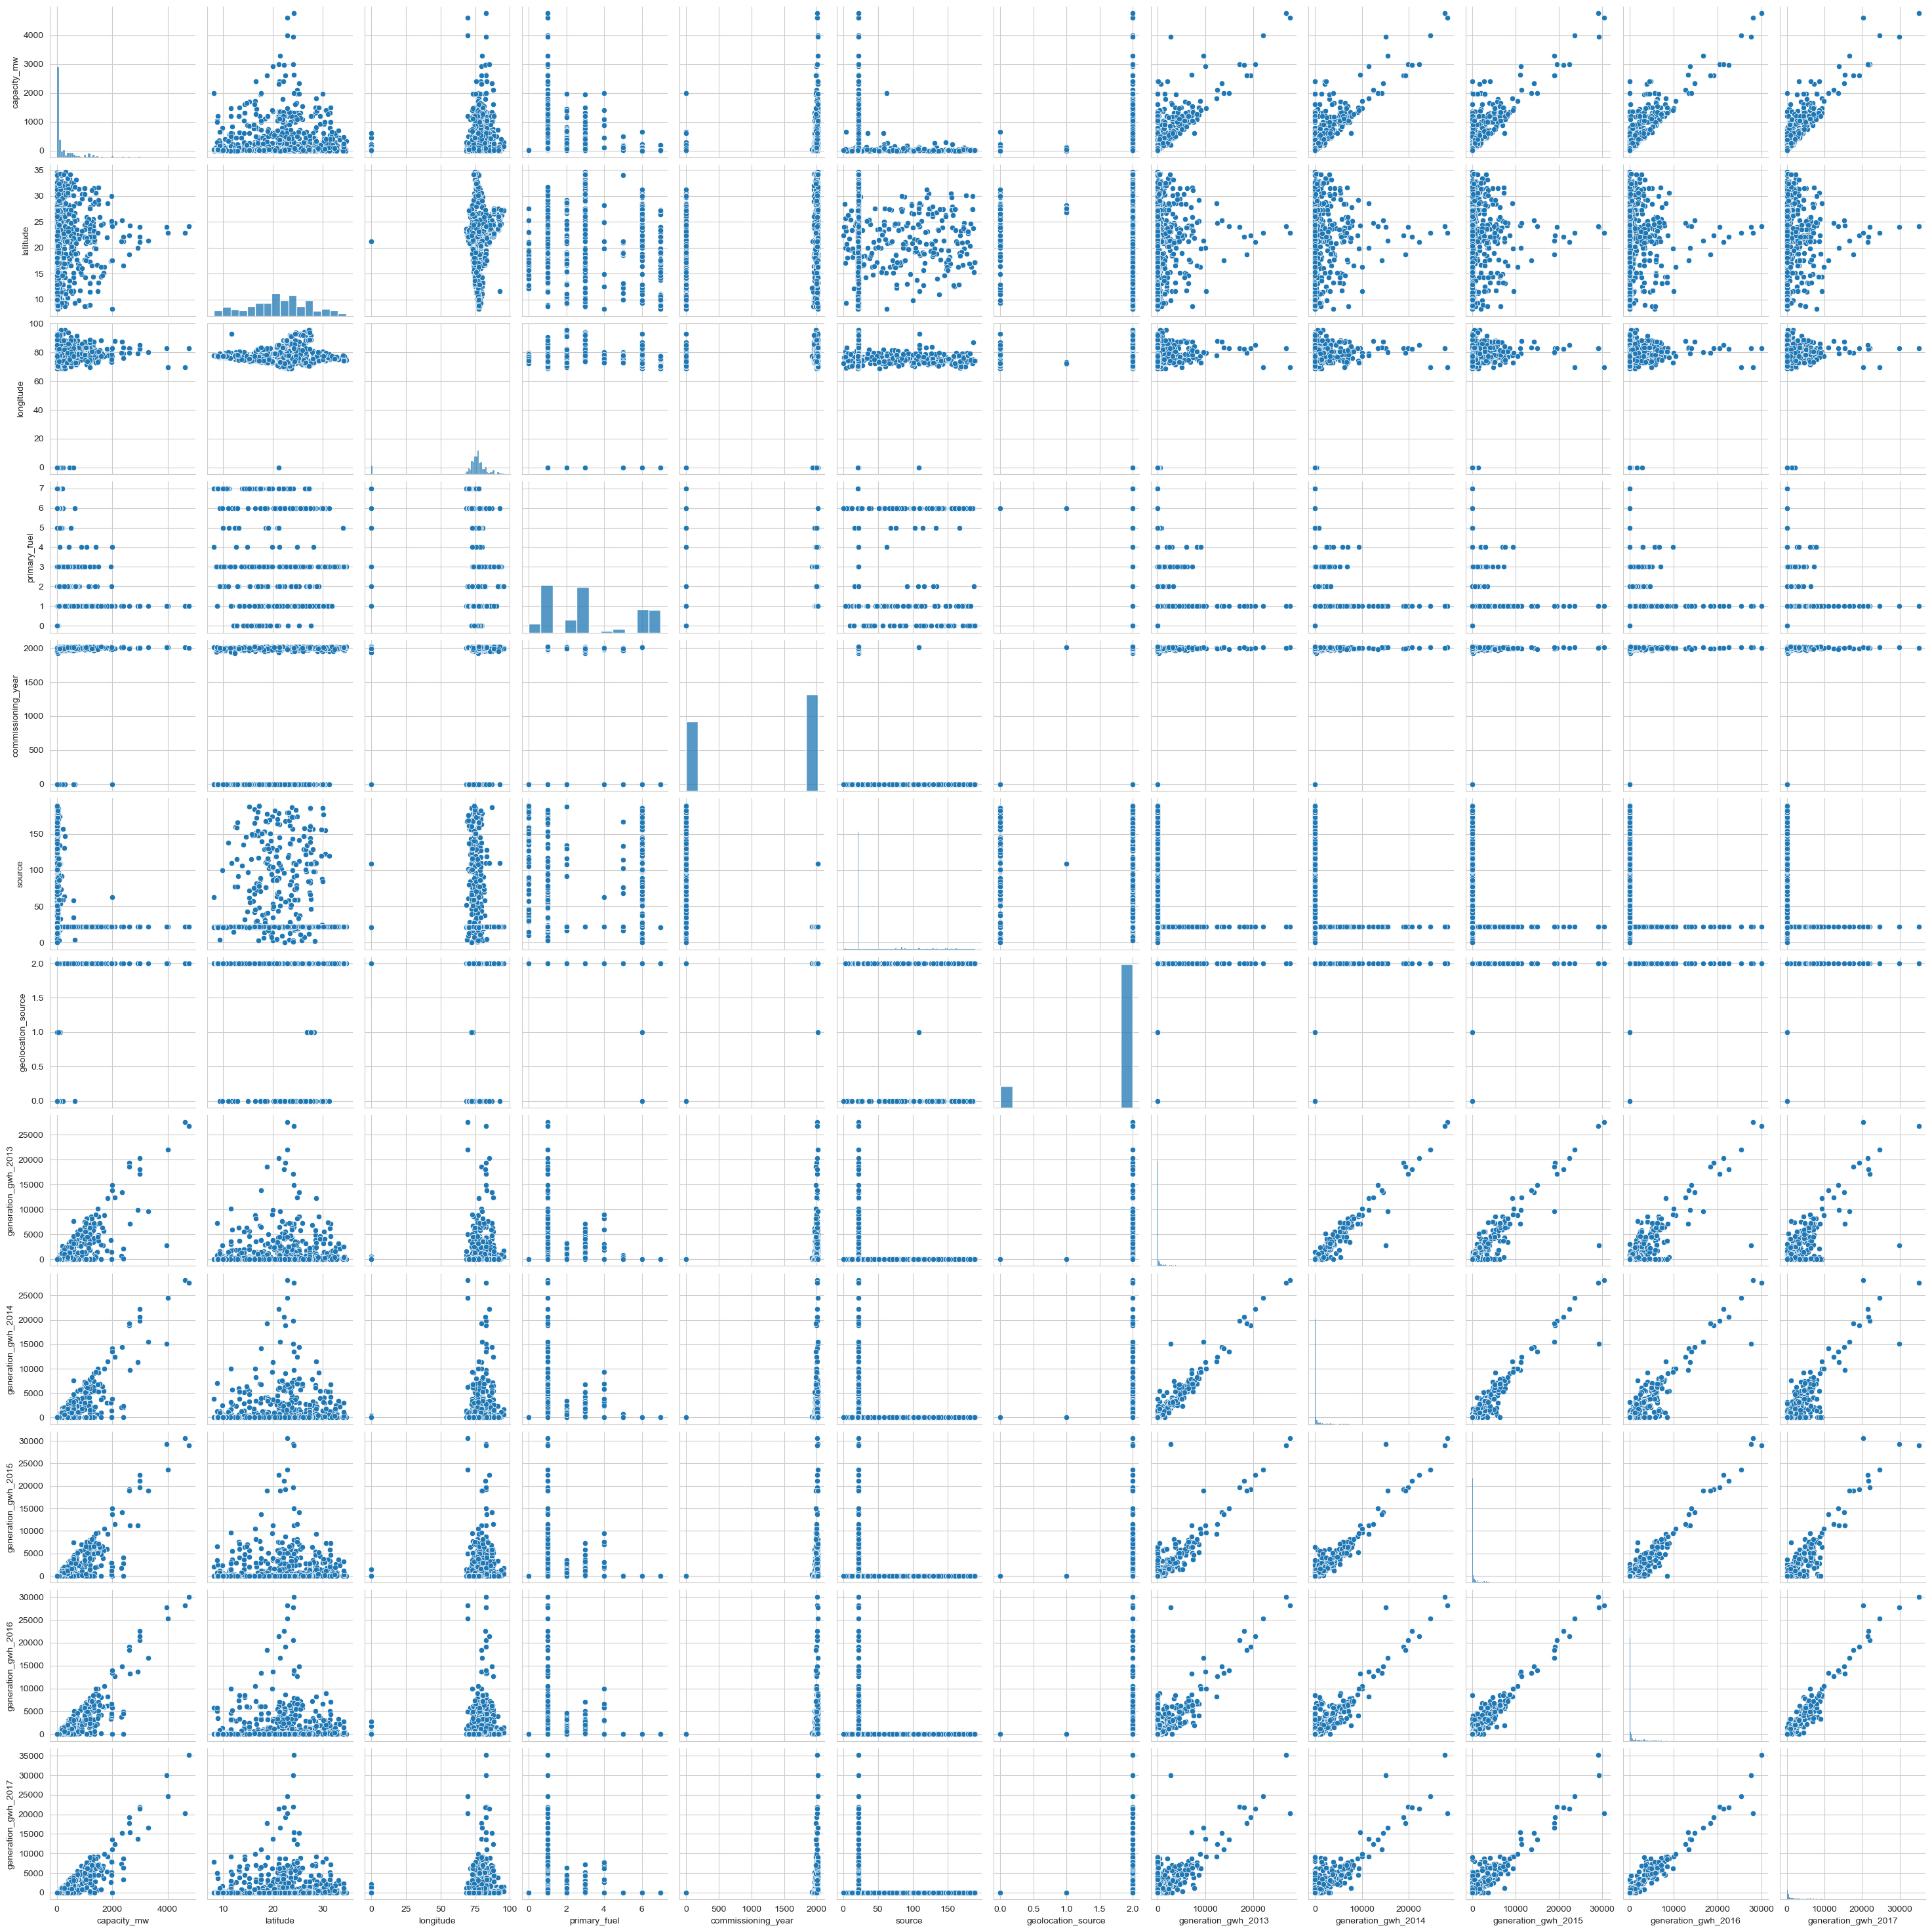

In [43]:
sns.pairplot(df)
plt.show()

Here we are checking outliers in the data.

capacity_mw               Axes(0.125,0.653529;0.168478x0.226471)
latitude               Axes(0.327174,0.653529;0.168478x0.226471)
longitude              Axes(0.529348,0.653529;0.168478x0.226471)
primary_fuel           Axes(0.731522,0.653529;0.168478x0.226471)
commissioning_year        Axes(0.125,0.381765;0.168478x0.226471)
source                 Axes(0.327174,0.381765;0.168478x0.226471)
geolocation_source     Axes(0.529348,0.381765;0.168478x0.226471)
generation_gwh_2013    Axes(0.731522,0.381765;0.168478x0.226471)
generation_gwh_2014           Axes(0.125,0.11;0.168478x0.226471)
generation_gwh_2015        Axes(0.327174,0.11;0.168478x0.226471)
generation_gwh_2016        Axes(0.529348,0.11;0.168478x0.226471)
generation_gwh_2017        Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

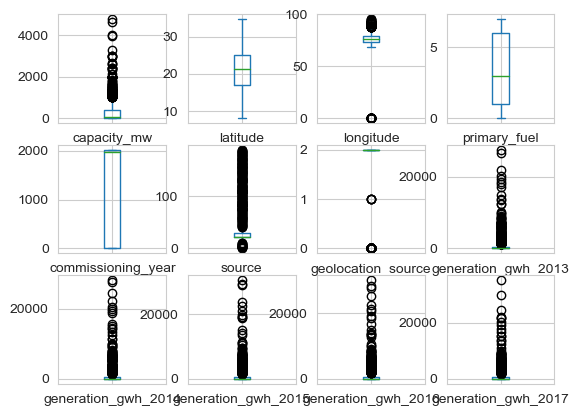

In [48]:
df.plot(kind='box',subplots=True,layout=(3,4))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

In [49]:
from scipy.stats import zscore
out_features=df[['longitude','source','geolocation_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
z=np.abs(zscore(out_features))
z

,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.016072,1.461366,1.084288,0.358933,0.365756,0.364260,0.377625,0.387972
1,0.061478,2.918781,0.393991,0.358933,0.365756,0.364260,0.377625,0.387972
2,0.235268,0.511750,0.393991,0.358933,0.365756,0.364260,0.377625,0.387972
3,1.010875,0.489328,0.393991,0.126210,0.154365,0.092259,0.094331,0.179484
4,0.503559,0.489328,0.393991,0.255601,0.672931,1.543015,1.618534,1.303612
...,...,...,...,...,...,...,...,...
903,0.217213,0.489328,0.393991,0.358933,0.365756,0.363939,0.302934,0.116154
904,0.263042,0.743869,2.562566,0.358933,0.365756,0.364260,0.377625,0.387972
905,0.116573,0.511750,0.393991,0.358933,0.365756,0.364260,0.377625,0.387972
906,0.012663,0.340278,0.393991,0.358933,0.365756,0.364260,0.377625,0.387972


In [50]:
threshold=3
np.where(z>3)

(array([ 14,  15,  15,  15,  25,  43,  46,  68,  72,  73,  81, 144, 144,
        144, 144, 144, 159, 159, 179, 192, 193, 202, 209, 210, 210, 210,
        210, 210, 251, 300, 309, 309, 309, 309, 309, 322, 330, 331, 333,
        346, 365, 365, 365, 365, 365, 387, 421, 423, 431, 436, 441, 467,
        479, 480, 484, 494, 494, 494, 494, 494, 495, 495, 495, 495, 495,
        503, 533, 533, 539, 541, 546, 624, 649, 649, 649, 649, 649, 656,
        658, 658, 658, 658, 658, 662, 670, 675, 681, 690, 696, 696, 696,
        696, 706, 712, 713, 722, 722, 722, 722, 722, 725, 725, 725, 725,
        725, 727, 727, 727, 727, 727, 732, 733, 742, 771, 774, 775, 776,
        777, 785, 787, 787, 787, 787, 787, 809, 809, 809, 809, 809, 829,
        833, 871, 872, 880, 881, 881, 881, 881, 881, 885, 887, 896, 901],
       dtype=int64),
 array([0, 5, 6, 7, 0, 0, 0, 0, 1, 0, 1, 3, 4, 5, 6, 7, 3, 4, 0, 1, 0, 0,
        0, 3, 4, 5, 6, 7, 0, 1, 3, 4, 5, 6, 7, 1, 0, 0, 0, 1, 3, 4, 5, 6,
        7, 0, 0, 0, 0, 0, 0

In [51]:
df1=df[(z<3).all(axis=1)]

In [52]:
df1.shape

(828, 12)

In [53]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 908
new dataframe: 828


In [54]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 8.81057268722467


As we can see there is less than 10% of data loss after removing the outliers so it is considerable.

Checking Skewness

In [55]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude             -3.589962
primary_fuel           0.471141
commissioning_year    -0.330431
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.158053
generation_gwh_2014    4.989441
generation_gwh_2015    5.264211
generation_gwh_2016    4.988235
generation_gwh_2017    4.983065
dtype: float64

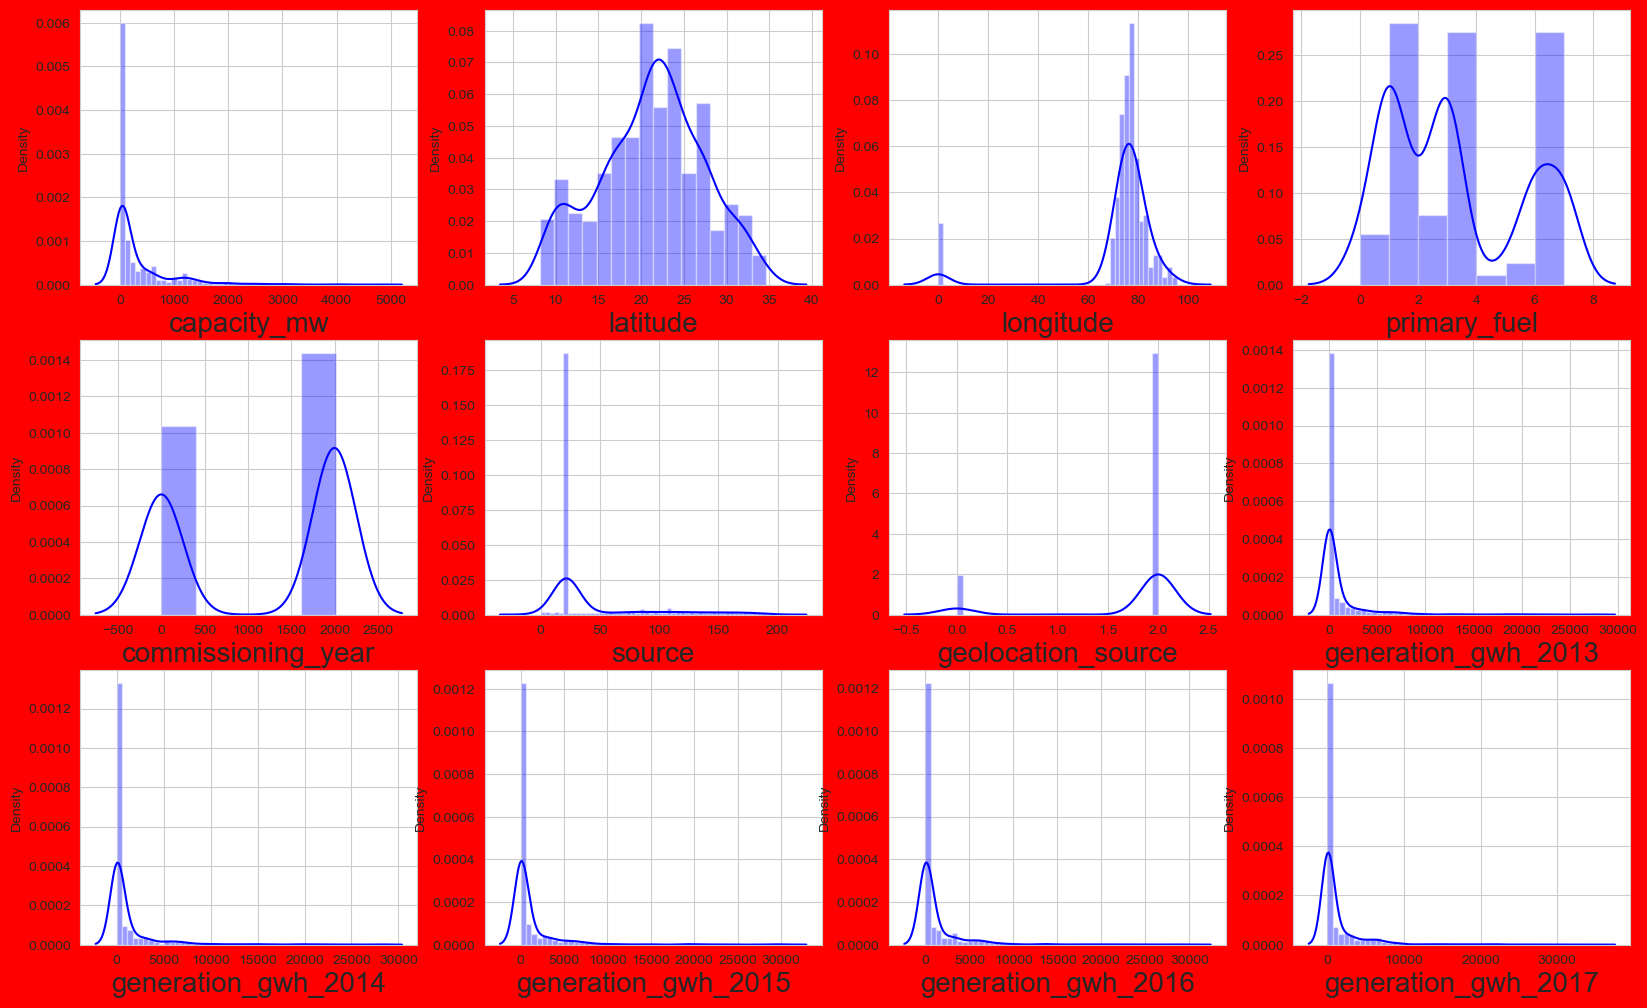

In [56]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [57]:
df['longitude']=np.cbrt(df['longitude'])

In [58]:
df['source']=np.cbrt(df['source'])

In [59]:
df['geolocation_source']=np.cbrt(df['geolocation_source'])

In [60]:
df['generation_gwh_2013']=np.cbrt(df['generation_gwh_2013'])

In [61]:
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])

In [62]:
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])

In [63]:
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])

In [64]:
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])

In [65]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude             -4.046557
primary_fuel           0.471141
commissioning_year    -0.330431
source                 1.325211
geolocation_source    -2.183888
generation_gwh_2013    1.386662
generation_gwh_2014    1.350397
generation_gwh_2015    1.327343
generation_gwh_2016    1.271545
generation_gwh_2017    1.228024
dtype: float64

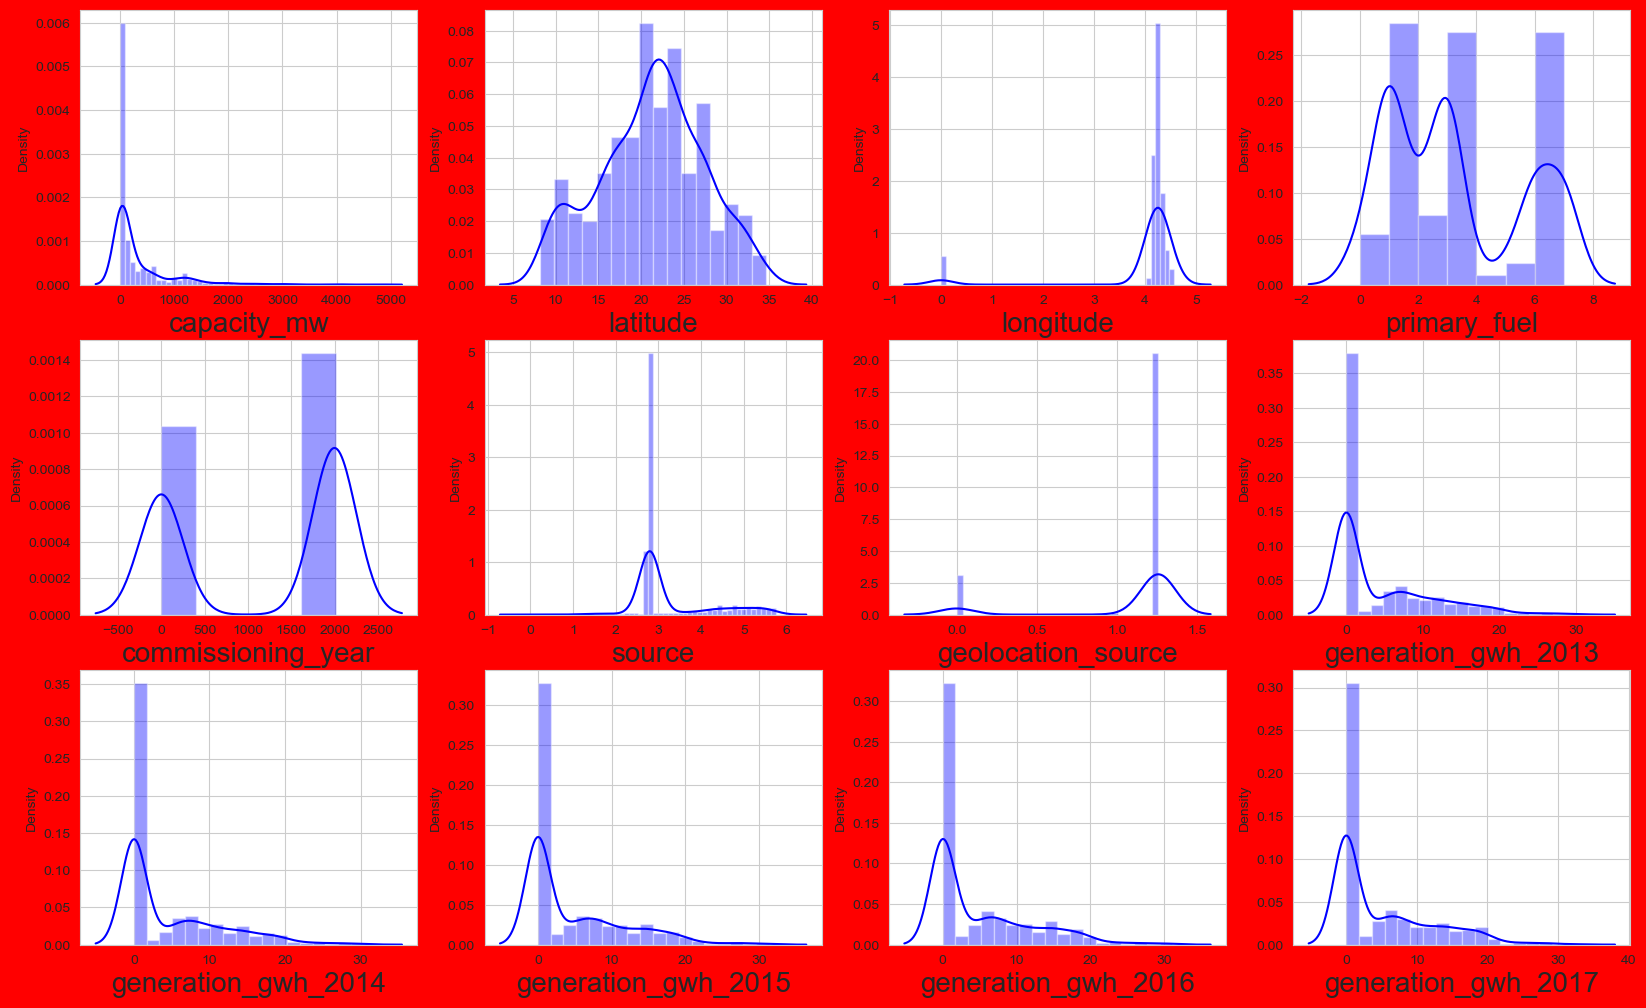

In [66]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Checking the Correlation b/w Target variable and Independent variable.

In [67]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.121424,-0.377783,0.413568,-0.236282,0.203546,0.674057,0.730322,0.786550,0.819871,0.828936
latitude,0.049790,1.000000,0.002166,-0.013453,0.089636,0.055279,-0.180438,0.090349,0.102235,0.108778,0.115238,0.133388
longitude,0.121424,0.002166,1.000000,-0.158772,-0.004582,0.050282,-0.066669,0.169469,0.173499,0.171508,0.160454,0.159010
primary_fuel,-0.377783,-0.013453,-0.158772,1.000000,-0.481100,0.043084,-0.479312,-0.397893,-0.415995,-0.445928,-0.465260,-0.471136
commissioning_year,0.413568,0.089636,-0.004582,-0.481100,1.000000,-0.529028,0.455519,0.578060,0.588844,0.606823,0.620906,0.627641
source,-0.236282,0.055279,0.050282,0.043084,-0.529028,1.000000,-0.484026,-0.328114,-0.333815,-0.343422,-0.350936,-0.354597
geolocation_source,0.203546,-0.180438,-0.066669,-0.479312,0.455519,-0.484026,1.000000,0.266669,0.271302,0.279110,0.285217,0.288192
generation_gwh_2013,0.674057,0.090349,0.169469,-0.397893,0.578060,-0.328114,0.266669,1.000000,0.969195,0.907492,0.860229,0.823633
generation_gwh_2014,0.730322,0.102235,0.173499,-0.415995,0.588844,-0.333815,0.271302,0.969195,1.000000,0.952735,0.908802,0.876906
generation_gwh_2015,0.786550,0.108778,0.171508,-0.445928,0.606823,-0.343422,0.279110,0.907492,0.952735,1.000000,0.961164,0.928384


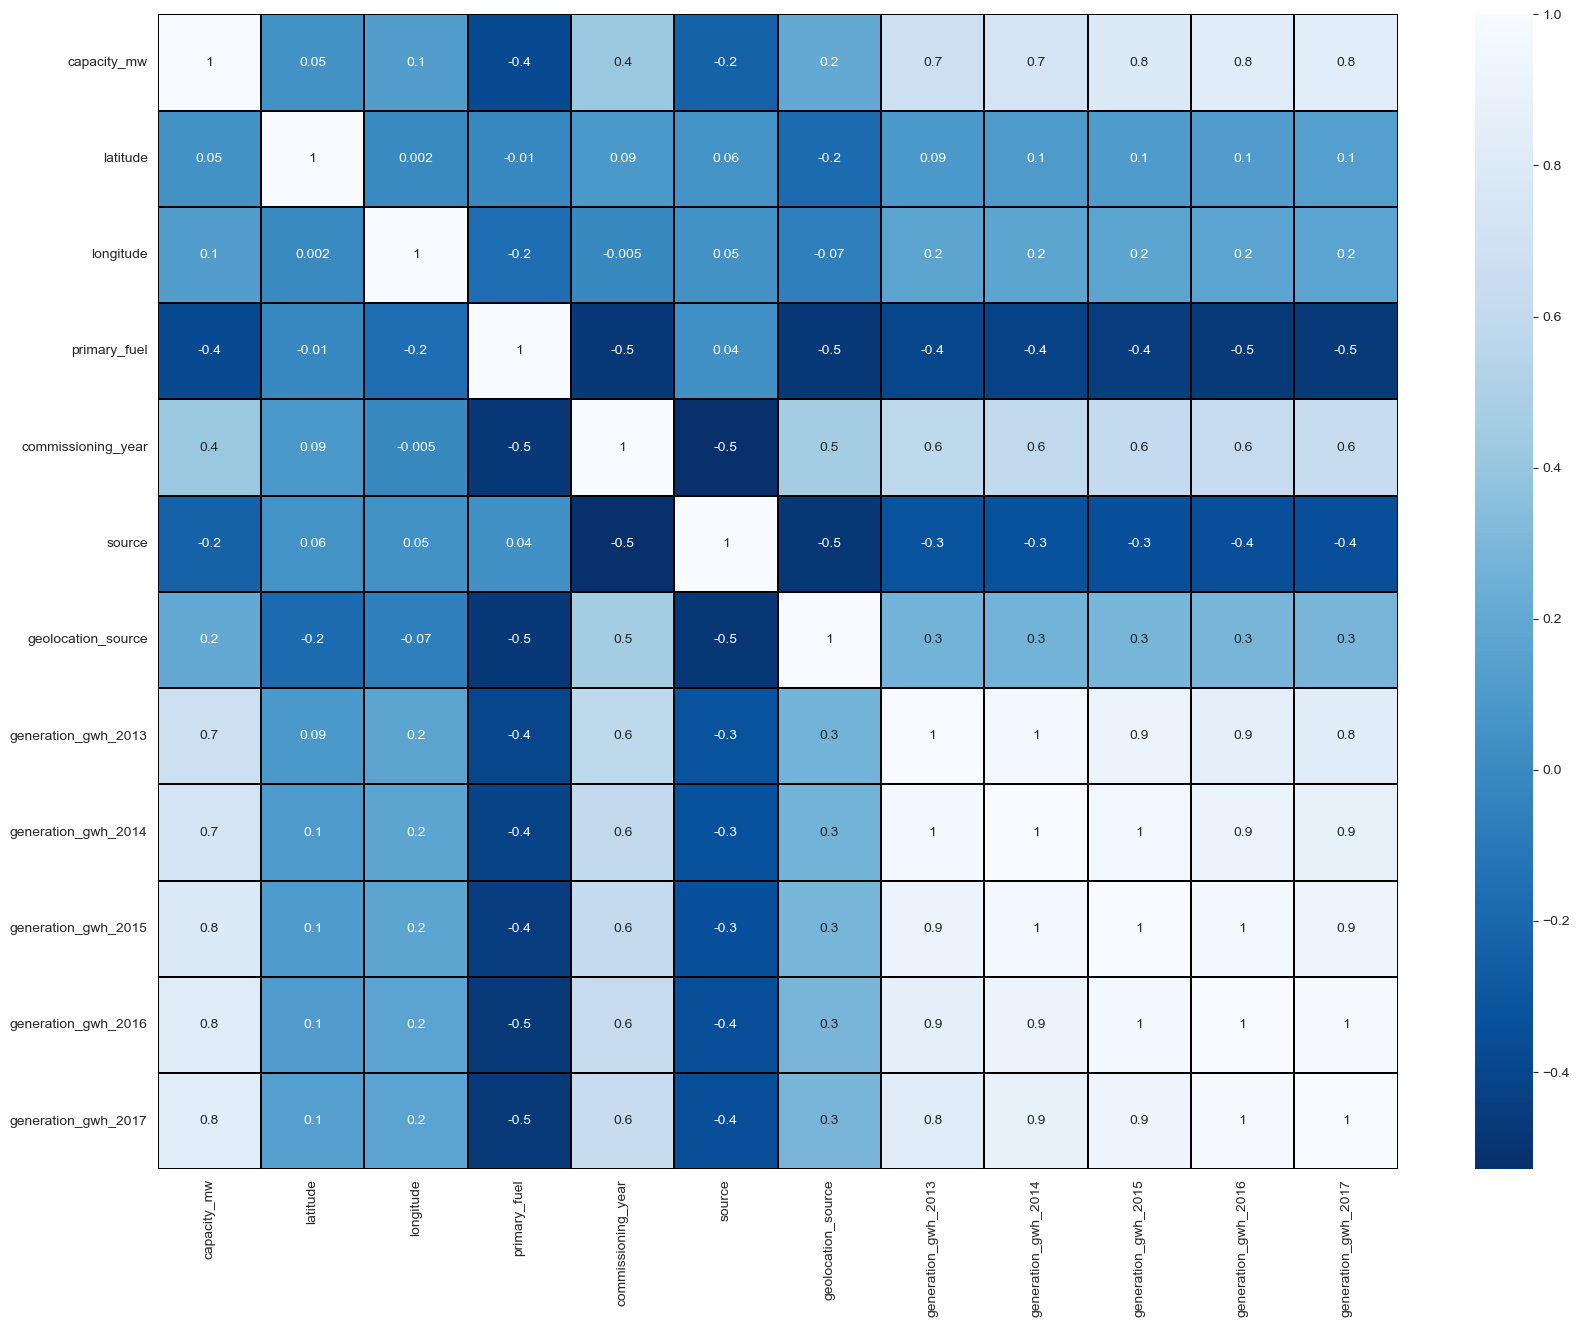

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [69]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [70]:
x.shape

(908, 11)

In [71]:
y.shape

(908,)

Feature scaling using StandardScaler method.

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [73]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.148396,0.148202,1.225418,0.862612,1.641484,-0.220321,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797
1,0.586730,0.175798,-0.967486,-1.178657,2.507770,0.391142,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797
2,0.116292,0.068294,1.663998,-1.178657,-0.527613,0.391142,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797
3,0.439625,0.489168,-0.528905,0.855506,-0.481268,0.391142,0.662501,0.601969,0.705774,0.694279,0.535926
4,0.125578,0.326994,-0.967486,0.866672,-0.481268,0.391142,1.176273,1.508963,2.003098,1.999790,1.820637
...,...,...,...,...,...,...,...,...,...,...,...
903,-0.805503,0.230213,-0.967486,0.867687,-0.481268,0.391142,-0.681769,-0.693615,-0.563629,0.183573,0.653580
904,-1.364556,0.245980,1.225418,-1.178657,1.079805,-2.572817,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797
905,-0.972987,0.195199,1.663998,-1.178657,-0.527613,0.391142,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797
906,0.518313,0.158467,-0.967486,-1.178657,0.691414,0.391142,-0.681769,-0.693615,-0.713578,-0.729190,-0.736797


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.097735,latitude
1,1.100449,longitude
2,2.074942,primary_fuel
3,2.443270,commissioning_year
4,1.984413,source
5,1.967566,geolocation_source
6,17.786643,generation_gwh_2013
7,33.444242,generation_gwh_2014
8,25.779982,generation_gwh_2015
9,42.138983,generation_gwh_2016


As we can seee there is multicorrelation present in the dataset generation_gwh_2016.here has highly correlated and VIF value here is high so we can Drop this column.

In [75]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.093413,latitude
1,1.099006,longitude
2,2.073880,primary_fuel
3,2.442462,commissioning_year
4,1.984361,source
5,1.966336,geolocation_source
6,17.725043,generation_gwh_2013
7,33.262105,generation_gwh_2014
8,18.425978,generation_gwh_2015
9,8.005413,generation_gwh_2017


In [77]:
x.drop('generation_gwh_2014',axis=1,inplace=True)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.093079,latitude
1,1.098900,longitude
2,2.071194,primary_fuel
3,2.439569,commissioning_year
4,1.983679,source
5,1.965401,geolocation_source
6,5.849479,generation_gwh_2013
7,13.417987,generation_gwh_2015
8,7.966976,generation_gwh_2017


Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [81]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.7986605714536046 On random states 31


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [83]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.7469591934160016
R2_score on train data: 70.1831973575634
Mean absolute error: 185.46211459046538
Mean squared error: 118749.39894751123
Root mean squared error: 344.60034670254066


In [86]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.9043759059976582
R2_score on train data: 97.58255231382648
Mean absolute error: 102.18206997749056
Mean squared error: 44875.38528260639
Root mean squared error: 211.83811102492012


In [87]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.8759530417521544
R2_score on train data: 88.65430327487428
Mean absolute error: 95.24669670329672
Mean squared error: 58213.93763344966
Root mean squared error: 241.27564658176686


In [88]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.9029885104380168
R2_score on train data: 95.79191337281777
Mean absolute error: 103.11052568917049
Mean squared error: 45526.47548040486
Root mean squared error: 213.36934053515012


In [89]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.7469587024844548
R2_score on train data: 70.18319735154121
Mean absolute error: 185.46135302386753
Mean squared error: 118749.62933654172
Root mean squared error: 344.60068098676436


In [90]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.7469591685523691
R2_score on train data: 70.18319735755732
Mean absolute error: 185.4620904680607
Mean squared error: 118749.4106157534
Root mean squared error: 344.6003636326482


In [91]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.8554690333488901
R2_score on train data: 99.99320570286147
Mean absolute error: 125.13272377622377
Mean squared error: 67826.86812778845
Root mean squared error: 260.4359194270031


In [93]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.9107627463399847
R2_score on train data: 99.99320569376798
Mean absolute error: 94.94379196303694
Mean squared error: 41878.10803683842
Root mean squared error: 204.64141329857557


Now we can check cross valdiation of all the model.

In [95]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.71155672 0.59866061 0.62707267 0.80204089 0.7361391 ]
0.6950939973902929
difference b/w R2_score and cross_val_score is: 5.186519602570872


In [96]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.83235584 0.83529135 0.79013889 0.83370077 0.86350421]
0.830998213184581
difference b/w R2_score and cross_val_score is: 4.495482856757338


In [97]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.85082752 0.82168231 0.81821804 0.81888429 0.89238186]
0.8403988046106857
difference b/w R2_score and cross_val_score is: 6.258970582733103


In [98]:
score8=cross_val_score(Rfr,x,y)
print(score8)
print(score8.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Rfr)-score8.mean())*100)

[0.82112255 0.83051256 0.80526372 0.84605023 0.89044652]
0.8386791164681877
difference b/w R2_score and cross_val_score is: 6.5696789529470445


In [99]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.7115572  0.59866534 0.6270717  0.80204059 0.73613854]
0.6950946735716753
difference b/w R2_score and cross_val_score is: 5.186402891277952


In [100]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.71155678 0.59866084 0.62707263 0.80204087 0.73613907]
0.6950940385176707
difference b/w R2_score and cross_val_score is: 5.186513003469839


In [101]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.78078546 0.65399584 0.67880503 0.69009049 0.84023764]
0.7287828922469586
difference b/w R2_score and cross_val_score is: 12.668614110193154


In [102]:
from sklearn.model_selection import RandomizedSearchCV
param={'weights':['uniform', 'distance']}
rscv=RandomizedSearchCV(KNN(),param,cv=3)
rscv.fit(x_train,y_train)
rscv.best_params_

{'weights': 'distance'}

In [103]:
model=KNN(weights='distance')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.8795946063197894
Mean absolute error: 93.36359453749492
Mean squared error: 56504.98954134951
Root mean squared error: 237.70778182749825


Saving the Model

In [104]:
import joblib
import pickle
filename='capacity_mw '
pickle.dump(model,open(filename,'wb'))

In [105]:
import pickle
load_model=pickle.load(open('capacity_mw','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

87.95946063197894


Conclusion

In [106]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [107]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,74.919475,48.454594,45.481781,270.956211,42.650454,52.735496,79.552641,59.11221,10.745897,533.025027,...,380.534842,732.910113,25.816827,13.108652,148.929739,11.531148,443.989145,13.553749,6.887805,12.543347
Original,98.000000,45.000000,106.600000,445.674000,41.400000,36.000000,36.000000,234.00000,2.000000,600.000000,...,331.500000,440.000000,25.500000,15.000000,115.000000,16.000000,315.000000,5.200000,24.000000,34.650000


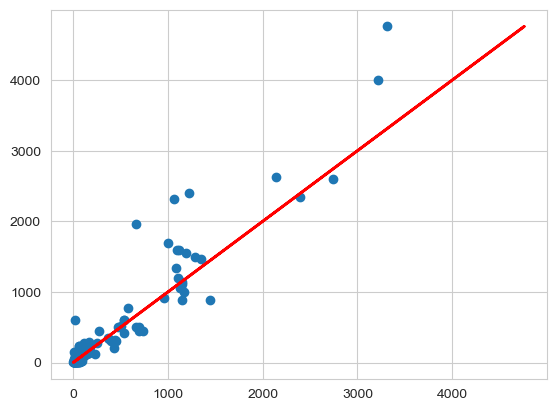

In [109]:
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL

In [110]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']


In [111]:
x.shape

(908, 11)

In [112]:
y.shape

(908,)

Model Bulding

As you can see this is Classification problem in this we have catgerocial data present so we use Classification model here

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [115]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.8388278388278388


In [116]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8424908424908425
[[11  2  0  0  0  0  0  1]
 [ 5 65  4  7  0  2  0  1]
 [ 0  2  6  6  0  1  0  0]
 [ 0  3  2 73  0  0  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73        14
         1.0       0.86      0.77      0.81        84
         2.0       0.43      0.40      0.41        15
         3.0       0.84      0.94      0.88        78
         4.0       0.00      0.00      0.00         4
         5.0       0.25      0.25      0.25         4
         6.0       1.00      1.00      1.00        33
         7.0       0.95      1.00      0.98        41

    accuracy                           0.84       273
   macro avg       0.63      0.64      0.63       273
weighted avg       0.83      0.84      0.83       273



In [117]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.5347985347985348
[[ 0  0  0  0  0  0 14  0]
 [ 0 48  0 13  0  0 23  0]
 [ 0  0  0 12  0  0  3  0]
 [ 0 10  0 68  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  2  0]
 [ 0  0  0  3  0  0 30  0]
 [ 0  0  0  0  0  0 41  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.79      0.57      0.66        84
         2.0       0.00      0.00      0.00        15
         3.0       0.69      0.87      0.77        78
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         4
         6.0       0.27      0.91      0.41        33
         7.0       0.00      0.00      0.00        41

    accuracy                           0.53       273
   macro avg       0.22      0.29      0.23       273
weighted avg       0.47      0.53      0.47       273



In [118]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))


0.5494505494505495
[[ 0  0  0 12  0  0  0  2]
 [ 0  0  0 83  0  0  0  1]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0 78  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  3  0  0  0  1]
 [ 0  0  0  2  0  0 31  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        84
         2.0       0.00      0.00      0.00        15
         3.0       0.40      1.00      0.57        78
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         4
         6.0       1.00      0.94      0.97        33
         7.0       0.91      1.00      0.95        41

    accuracy                           0.55       273
   macro avg       0.29      0.37      0.31       273
weighted avg       0.37      0.55      0.42       273



In [119]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.8205128205128205
[[12  2  0  0  0  0  0  0]
 [ 5 58  5 13  2  1  0  0]
 [ 0  1  7  7  0  0  0  0]
 [ 0  3  0 75  0  0  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  0  2  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.85      0.69      0.76        84
         2.0       0.41      0.47      0.44        15
         3.0       0.78      0.96      0.86        78
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         4
         6.0       1.00      0.94      0.97        33
         7.0       1.00      1.00      1.00        41

    accuracy                           0.82       273
   macro avg       0.59      0.61      0.60       273
weighted avg       0.82      0.82      0.81       273



In [120]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.8644688644688645
[[12  1  0  0  0  0  0  1]
 [ 3 70  2  6  0  2  0  1]
 [ 0  2  6  7  0  0  0  0]
 [ 0  3  2 73  0  0  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        14
         1.0       0.88      0.83      0.85        84
         2.0       0.50      0.40      0.44        15
         3.0       0.84      0.94      0.88        78
         4.0       0.00      0.00      0.00         4
         5.0       0.33      0.25      0.29         4
         6.0       1.00      1.00      1.00        33
         7.0       0.95      1.00      0.98        41

    accuracy                           0.86       273
   macro avg       0.66      0.66      0.66       273
weighted avg       0.85      0.86      0.85       273



In [121]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc=dc.predict(x_test)
print(accuracy_score(y_test,preddc))
print(confusion_matrix(y_test,preddc))
print(classification_report(y_test,preddc))


0.7765567765567766
[[11  3  0  0  0  0  0  0]
 [ 6 50 10 10  6  2  0  0]
 [ 0  3  6  5  0  1  0  0]
 [ 0  1  7 69  0  1  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.82      0.60      0.69        84
         2.0       0.24      0.40      0.30        15
         3.0       0.82      0.88      0.85        78
         4.0       0.00      0.00      0.00         4
         5.0       0.33      0.50      0.40         4
         6.0       1.00      1.00      1.00        33
         7.0       1.00      1.00      1.00        41

    accuracy                           0.78       273
   macro avg       0.61      0.65      0.62       273
weighted avg       0.81      0.78      0.79       273



In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.82417582 0.83516484 0.9010989  0.87292818 0.85635359]
0.8579442656790721
difference b/w Accuracy_score and cross_val_score is: -0.01545342318822962


In [123]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.52197802 0.51648352 0.56593407 0.55248619 0.53038674]
0.53745370651448
difference b/w Accuracy_score and cross_val_score is: -0.0026551717159452037


In [124]:

score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())


[0.45054945 0.42307692 0.56043956 0.43093923 0.4640884 ]
0.4658187116750653
difference b/w Accuracy_score and cross_val_score is: 0.08363183777548422


In [125]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())

[0.82967033 0.81318681 0.89010989 0.81767956 0.83425414]
0.8369801469248983
difference b/w Accuracy_score and cross_val_score is: -0.01646732641207782


In [126]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.80769231 0.82967033 0.87362637 0.83977901 0.86740331]
0.8436342662862
difference b/w Accuracy_score and cross_val_score is: 0.020834598182664532


As we can see above all model Accuracy_score and crossval_score is less and score mean is 85 in  RandomForestClassifier() model so this is the best model.

Hyper parameter tunning

In [127]:
from sklearn.model_selection import  RandomizedSearchCV
param={'criterion':['gini', 'entropy', 'log_loss']}
rscv= RandomizedSearchCV(RandomForestClassifier(),param,cv=5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'criterion': 'gini'}

In [143]:
model=RandomForestClassifier(criterion='gini')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.51648351648352


Plotting Roc and AUC curve

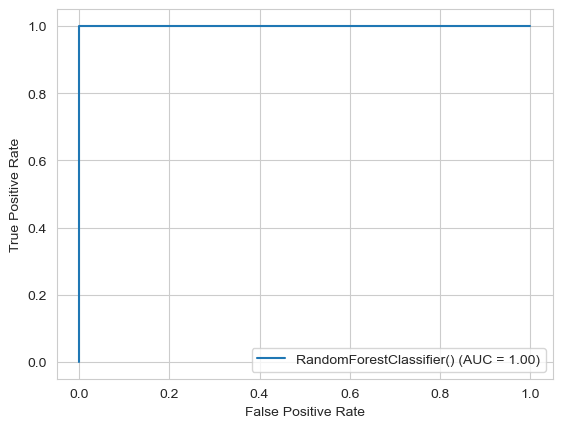

In [144]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=7)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

Save the model

In [145]:
import joblib
model=joblib.dump(model,'Global Power Plant Classification.pkl')

In [146]:
import joblib
model=joblib.load('Global Power Plant Classification.pkl')
prediction=model.predict(x_test)
prediction

array([6., 3., 0., 7., 1., 7., 3., 3., 1., 3., 0., 7., 3., 1., 0., 7., 3.,
       3., 1., 3., 6., 7., 1., 1., 1., 3., 6., 6., 3., 1., 1., 3., 7., 1.,
       3., 1., 7., 6., 3., 1., 1., 6., 6., 6., 1., 7., 6., 3., 6., 1., 7.,
       1., 3., 2., 3., 1., 1., 3., 3., 0., 1., 3., 0., 3., 1., 3., 2., 3.,
       3., 2., 1., 3., 3., 3., 5., 3., 1., 0., 3., 3., 3., 1., 1., 2., 3.,
       5., 6., 1., 3., 3., 6., 0., 1., 3., 6., 1., 2., 7., 2., 7., 7., 6.,
       7., 0., 3., 2., 7., 0., 3., 1., 3., 3., 3., 1., 1., 1., 7., 7., 7.,
       7., 1., 3., 1., 3., 3., 7., 7., 1., 7., 3., 6., 6., 3., 2., 1., 6.,
       3., 2., 3., 1., 3., 1., 3., 1., 1., 7., 1., 3., 3., 7., 1., 6., 6.,
       6., 3., 3., 1., 3., 6., 1., 1., 7., 7., 3., 3., 7., 0., 1., 1., 3.,
       3., 1., 1., 1., 1., 6., 7., 7., 0., 3., 7., 6., 3., 7., 1., 2., 3.,
       0., 3., 3., 6., 3., 2., 6., 1., 3., 3., 3., 3., 3., 7., 3., 1., 3.,
       6., 7., 6., 3., 3., 3., 0., 3., 1., 1., 1., 0., 3., 1., 7., 3., 7.,
       3., 1., 5., 1., 3.

In [147]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,6.0,6.0
1,3.0,3.0
2,0.0,0.0
3,7.0,7.0
4,1.0,1.0
...,...,...
268,1.0,1.0
269,3.0,3.0
270,1.0,1.0
271,3.0,3.0
